In [88]:
from bs4 import BeautifulSoup
import requests
import re
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
from textblob import TextBlob
from pattern.en import sentiment
import streamlit as st
import datetime 
from datetime import date
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [92]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
url_usnews = "https://www.usnews.com/"
html_tag_us = 'Box-w0dun1-0 ArmRestTopStories__Part-s0vo7p-1 erkdnc biVKSR'
html_tag_us1 = 'Box-w0dun1-0 ArmRestTopStories__Container-s0vo7p-0 dWWnRo jkIDND'
html_tag_us2 = 'BoxFeed__Container-jz7vbv-0 kCAxPf'
my_header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

page_usnews = requests.get(url_usnews, headers = my_header)
soup_usnews = BeautifulSoup(page_usnews.text, 'lxml')
content_usnews = soup_usnews.findAll('div', attrs = {'class': html_tag_us2})


In [97]:
content_usnews

[<div class="BoxFeed__Container-jz7vbv-0 kCAxPf" spacing="5"><div class="Box-w0dun1-0 BoxFeed__Tiles-jz7vbv-1 eLivRJ jDlzke" spacing="5"><div class="Box-w0dun1-0 ZUkgD"><p class="Heading-sc-1w5xk2o-0 Kicker__KickerBlock-k30x22-0 cyfevJ hvtRvH"><a class="Anchor-byh49a-0 Kicker__KickerAnchor-k30x22-1 PlBer bpOKWX" href="https://www.usnews.com/news/world">World</a></p><div class="Box-w0dun1-0 ListBox__Content-sc-10q7qch-0 dWWnRo gibkrk"><p class="Paragraph-sc-1iyax29-0 gbfwFt"><a class="Anchor-byh49a-0 jgdIrj" href="https://www.usnews.com/news/world/articles/2023-02-12/italys-berlusconi-says-he-wouldnt-seek-meeting-with-zelenskiy-if-pm">Italy's Berlusconi Says He Wouldn't Seek Meeting With Zelenskiy if PM</a></p><p class="Paragraph-sc-1iyax29-0 gbfwFt"><a class="Anchor-byh49a-0 jgdIrj" href="https://www.usnews.com/news/world/articles/2023-02-12/business-owners-in-turkeys-antakya-empty-their-shops-to-avoid-looters">Business Owners in Turkey’s Antakya Empty Their Shops to Avoid Looters</a><

In [111]:
content_usnews[0].findAll('p', attrs = {'class' : 'Heading-sc-1w5xk2o-0 Kicker__KickerBlock-k30x22-0 cyfevJ hvtRvH'})[8]

<p class="Heading-sc-1w5xk2o-0 Kicker__KickerBlock-k30x22-0 cyfevJ hvtRvH"><a class="Anchor-byh49a-0 Kicker__KickerAnchor-k30x22-1 PlBer bpOKWX" href="https://www.usnews.com/news/sports">Sports</a></p>

In [104]:
top_stories = []
top_stories_topic = []
# for i in range(len(content_usnews[0].findAll('h3'))):
#     top_stories.append(content_usnews[0].findAll('h3')[i].text)
# for i in range(len(content_usnews[0].findAll('p'))):
#     top_stories.append(content_usnews[0].findAll('p')[i].text)

In [120]:
for i in range(len(content_usnews[0].findAll('a'))):
    if(content_usnews[0].findAll('a')[i].text not in ['World', 'Politics','Business', 
                                                       'Health', 'Science', 'Offbeat',  'U.S. News® ', 
                                                       'Entertainment', 'Sports' ]):
        top_stories.append(content_usnews[0].findAll('a')[i].text)
# for j in :
#     top_stories_topic.append(content_usnews[0].find('p', attrs = {'class' : 'Heading-sc-1w5xk2o-0 Kicker__KickerBlock-k30x22-0 cyfevJ hvtRvH'})[j].text)

KeyError: 1

In [87]:
top_stories 


["Italy's Berlusconi Says He Wouldn't Seek Meeting With Zelenskiy if PM",
 'Business Owners in Turkey’s Antakya Empty Their Shops to Avoid Looters',
 'Town in North Cyprus Buries Last of High School Volleyball Team Killed in Quake',
 'Sen. Schumer Says 2 Downed Objects Believed to Be Balloons',
 "GOP Election Tactics No Surprise to Wisconsin's Black Voters",
 "Army Sees Safety, Not 'Wokeness,' as Top Recruiting Obstacle",
 'In Mexico, US Complaints Help Union Organizing Efforts',
 'Mars Wrigley Fined After Workers Fall Into Vat of Chocolate',
 'Fundraisers for Syria, Turkey Earthquake Try to Deliver Aid',
 'Health Crisis Leads Scores of Yanomami to Roam the Streets',
 "Florida Doctors' Board Tightens Ban on Gender-Affirming Care",
 'Florida Backs off Athlete Menstrual Data, but Debate Lingers',
 'Russian Spacecraft Leaks Coolant, Station Crew Reported Safe',
 'US Takes Another Step Toward Gearing up Nuclear Pit Factory',
 "Don't Feed the Bears! but Birds OK, New Tahoe Research Shows",


In [121]:
df = pd.DataFrame(top_stories)
df.rename(columns={0: "Headlines"}, inplace = True)
df

,Headlines
0,Italy's Berlusconi Says He Wouldn't Seek Meeti...
1,Business Owners in Turkey’s Antakya Empty Thei...
2,Town in North Cyprus Buries Last of High Schoo...
3,Sen. Schumer Says 2 Downed Objects Believed to...
4,GOP Election Tactics No Surprise to Wisconsin'...
...,...
139,‘Magic Mike's Last Dance' Wins Super Bowl Week...
140,Sergio Hudson Delivers Colorful ‘90s Celebrati...
141,AP Source: Cavaliers Close to Deal With Vetera...
142,AP Source: Eagles' Steichen Leads Colts' Coach...


# Sentiment Analysis

In [122]:

sia = SentimentIntensityAnalyzer()
results = []
for line in top_stories:
    
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)


In [64]:
df = pd.DataFrame.from_records(results)

In [65]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1

In [66]:
df['scraped_date'] = date.today()

In [67]:
df = df.reindex(columns=['scraped_date','headline','neg', 'neu', 'pos', 'compound', 'label'])

In [68]:
df.rename(columns = {'neg':'negative', 'neu':'neutral', 'pos':'positive'}, inplace = True)
df

,scraped_date,headline,negative,neutral,positive,compound,label
0,2023-02-12,Italy's Berlusconi Says He Wouldn't Seek Meeti...,0.000,1.000,0.000,0.0000,0
1,2023-02-12,Business Owners in Turkey’s Antakya Empty Thei...,0.308,0.692,0.000,-0.4588,-1
2,2023-02-12,Town in North Cyprus Buries Last of High Schoo...,0.257,0.743,0.000,-0.6705,-1
3,2023-02-12,Sen. Schumer Says 2 Downed Objects Believed to...,0.000,1.000,0.000,0.0000,0
4,2023-02-12,GOP Election Tactics No Surprise to Wisconsin'...,0.195,0.619,0.186,-0.0258,0
5,2023-02-12,"Army Sees Safety, Not 'Wokeness,' as Top Recru...",0.317,0.465,0.217,-0.0752,0
6,2023-02-12,"In Mexico, US Complaints Help Union Organizing...",0.237,0.526,0.237,0.0000,0
7,2023-02-12,Mars Wrigley Fined After Workers Fall Into Vat...,0.000,1.000,0.000,0.0000,0
8,2023-02-12,"Fundraisers for Syria, Turkey Earthquake Try t...",0.000,1.000,0.000,0.0000,0
9,2023-02-12,Health Crisis Leads Scores of Yanomami to Roam...,0.313,0.687,0.000,-0.6249,-1


In [79]:
df.to_csv('usnews.csv', index=False)

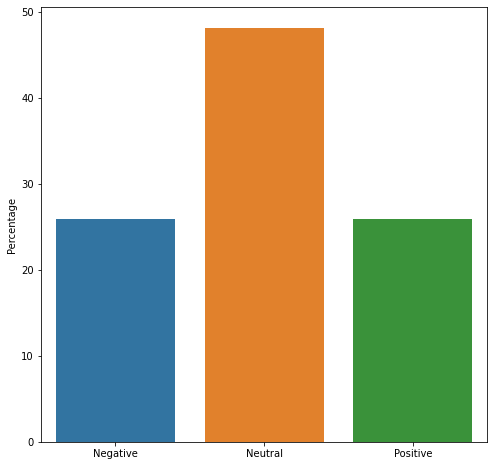

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [71]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\s', gaps=True)

In [72]:
def process_text(top_stories):
    tokens = []
    for line in top_stories:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stopwords]
        tokens.extend(toks)
    
    return tokens

In [73]:
top_stories

["Italy's Berlusconi Says He Wouldn't Seek Meeting With Zelenskiy if PM",
 'Business Owners in Turkey’s Antakya Empty Their Shops to Avoid Looters',
 'Town in North Cyprus Buries Last of High School Volleyball Team Killed in Quake',
 'Sen. Schumer Says 2 Downed Objects Believed to Be Balloons',
 "GOP Election Tactics No Surprise to Wisconsin's Black Voters",
 "Army Sees Safety, Not 'Wokeness,' as Top Recruiting Obstacle",
 'In Mexico, US Complaints Help Union Organizing Efforts',
 'Mars Wrigley Fined After Workers Fall Into Vat of Chocolate',
 'Fundraisers for Syria, Turkey Earthquake Try to Deliver Aid',
 'Health Crisis Leads Scores of Yanomami to Roam the Streets',
 "Florida Doctors' Board Tightens Ban on Gender-Affirming Care",
 'Florida Backs off Athlete Menstrual Data, but Debate Lingers',
 'Russian Spacecraft Leaks Coolant, Station Crew Reported Safe',
 'US Takes Another Step Toward Gearing up Nuclear Pit Factory',
 "Don't Feed the Bears! but Birds OK, New Tahoe Research Shows",


In [75]:
stopwords = nltk.corpus.stopwords.words('english')

In [76]:
process_text(top_stories)

["italy's",
 'berlusconi',
 'says',
 'seek',
 'meeting',
 'zelenskiy',
 'pm',
 'business',
 'owners',
 'turkey’s',
 'antakya',
 'empty',
 'shops',
 'avoid',
 'looters',
 'town',
 'north',
 'cyprus',
 'buries',
 'last',
 'high',
 'school',
 'volleyball',
 'team',
 'killed',
 'quake',
 'sen.',
 'schumer',
 'says',
 '2',
 'downed',
 'objects',
 'believed',
 'balloons',
 'gop',
 'election',
 'tactics',
 'surprise',
 "wisconsin's",
 'black',
 'voters',
 'army',
 'sees',
 'safety,',
 "'wokeness,'",
 'top',
 'recruiting',
 'obstacle',
 'mexico,',
 'us',
 'complaints',
 'help',
 'union',
 'organizing',
 'efforts',
 'mars',
 'wrigley',
 'fined',
 'workers',
 'fall',
 'vat',
 'chocolate',
 'fundraisers',
 'syria,',
 'turkey',
 'earthquake',
 'try',
 'deliver',
 'aid',
 'health',
 'crisis',
 'leads',
 'scores',
 'yanomami',
 'roam',
 'streets',
 'florida',
 "doctors'",
 'board',
 'tightens',
 'ban',
 'gender-affirming',
 'care',
 'florida',
 'backs',
 'athlete',
 'menstrual',
 'data,',
 'debate',

In [77]:
freq_dist = nltk.FreqDist(process_text(top_stories))

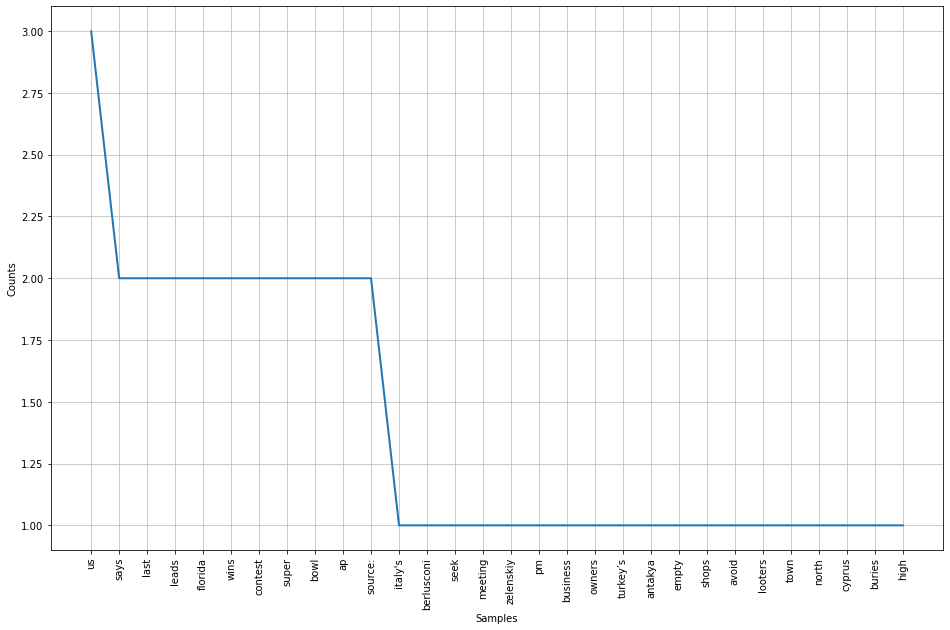

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [83]:
plt.subplots(figsize=(16,10))
freq_dist.plot(30)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS


def main():
    df = pd.read_csv('rleaves_clean.csv', encoding='utf-8')
    wordcloud_text = ' '.join(df['raw'].tolist())
    mask = np.array(Image.open('marijuana.png'))
    wordcloud_user = WordCloud(width=300, height=200, background_color='rgba(255, 255, 255, 0)', mode='RGBA', colormap='tab10', collocations=False, mask=mask, include_numbers=True)
    wordcloud_user.generate(wordcloud_text)
    #wordcloud_user.to_file("wordcloud_user_leaves.png") # saves the image
    plot_cloud(wordcloud_user)

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

if __name__ == "__main__":
    main()

# Archive

In [264]:
textblob_sentiment=[]
for s in top_stories:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [231]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_textblob

,Sentence,Polarity,Subjectivity
0,Town in North Cyprus Buries Last of High Schoo...,-0.013333,0.202222
1,"After Quake, Syrian Schools Silent as Teachers...",0.000000,0.100000
2,Spain: Hundreds of Thousands March for Madrid'...,0.000000,0.000000
3,Sen. Schumer Says 2 Downed Objects Believed to...,0.000000,0.000000
4,GOP Election Tactics No Surprise to Wisconsin'...,-0.166667,0.433333
5,"Army Sees Safety, Not 'Wokeness,' as Top Recru...",0.500000,0.500000
6,"In Mexico, US Complaints Help Union Organizing...",0.000000,0.000000
7,Mars Wrigley Fined After Workers Fall Into Vat...,0.000000,0.000000
8,"Fundraisers for Syria, Turkey Earthquake Try t...",0.000000,0.000000
9,Health Crisis Leads Scores of Yanomami to Roam...,0.000000,0.000000


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

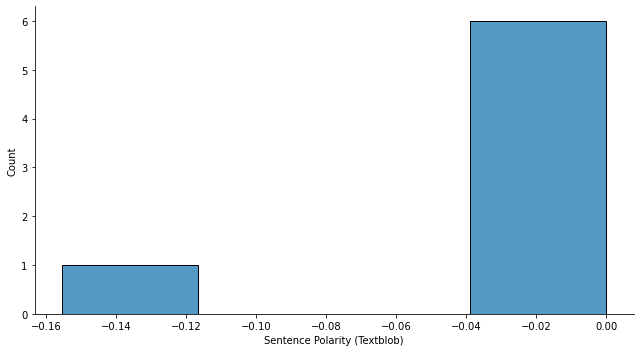

In [74]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

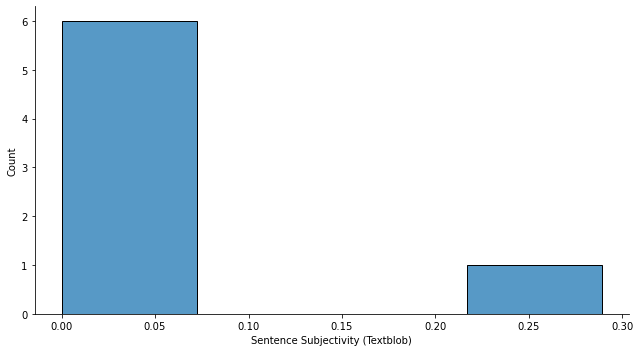

In [76]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [111]:
#Tokenizing the text
tokens = []
for i in top_stories:
    tokens.append(tokenizer.tokenize(i))


U.S. Shoots Down Object Over Canada
U.S. Tests ICBM Amid Nuclear Threats
Biden Trip to Mark Ukraine Invasion
McConnell Distances Party From Scott
Another Looming Abortion Ruling
Consumer Sentiment Improves In February
The Road Map Out of the COVID Crisis


In [116]:
tokens[0][0]

'U.S.'

In [120]:
words = []
# Looping through the tokens and make them lower case
for i in tokens:
    for word in i:
        words.append(word.lower())

In [130]:
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)